## Basic Data Processing with Pandas


- Introduction to Pandas
- The Series Data Structure
- Querying a Series
- DataFrame Data Structure
- DataFrame Indexing and Loading
- Querying a DataFrame
- Indexing a Data Frame / Indexing, Selection and Filtering
- Missing Values
- Function Aplicattion and Mapping
- Example: Manipulating Data Frame
- Summarizing and Computing Descriptive Statistics



### Introduccion a Pandas


- **Pandas** fue creado en 2008 por Wes Mckinney con mas de 100 desarrolladores de software comprometidos a ayudar a mejorarlo.Ahora se usaran herramientas dentro del curso.

- **StackOverflow** es un foro masivo de conocimiento de Python y contenido relacionado a Pandas. Es fuertemente utilizado por desarrolladores de Pandas. Contiene preguntas sobre programación, lenguajes de programación, kits de herramientas. Es muy probable que si etiqueta una pregunta como Pandas un deasrrollador de Pandas la responda.

- Otro recurso a considerar son los **libros**. 
    - Python for Data Analysis - Wes Mckinney
    - Learning the Pandas Library - Matt Harrison

- [**Planet Python**](http://planetpython.org/) Excelente blog para noticias de Python. Numero significativo de tutoriales sobre Data Science y Python. 

- [**Data Skeptic Podcast**](http://dataskeptic.com). Podcast por Kyle Polich creado en 2014. Cubre la DataScience de manera general. Incluye:
    - Mini educational lessons
    - Entrevistas
    - Trends
    - Share Community Project (OpenHouse)
    



Pandas va a ser una de las principales herramientas por el resto del curso. Pandas contiene estructuras de datos y herramientas para la manipulacion de datos diseñadas para hacer **data cleaning y analisis** rapido y facil en Python. Pandas esta diseñado para trabajar con data tabular y heterogenea, esa es la mayor diferencia con NumPy que se adapta mejor a trabajar con homogeneous numerical array data.

Los principales caballos de batalla de pandas son:
    - Series
    - DataFrames
 
### The Series Data Structure


En esta lectura vamos a explorar la estructura de Series de Pandas. La Serie es una de las principales estructuras de datos de Pandas. 
Una serie es un array-like object unidimensional que contiene una secuencia de valores y un arreglo asociado de data labels (etiquetas) llamadas _index_

Puedes pensar en ella como un cruce entre una lista o un diccionario. Los items estan almacenados en un orden y hay labels (etiquetas) con la que podemos manipularlos. Una forma facil de visualizar esto es a partir de dos columnas de datos, el primero es el indice especial (Index), muy parecido a las claves de un diccionario, mientras que el segundo son sus datos reales. Es importante tener en cuenta que la columna de datos tiene la etiqueta propia y se puede recuperar usando el atributo " .name ". Esto es diferente a los diccionarios y es util cuando se trata de fusionar multiples columnas de datos.

In [2]:
# Importamos pandas
import pandas as pd

In [4]:
# La serie mas simple la podemos crear con un arreglo de datos. La representacion se muestra con el indice
# a la izquierda y el valor a la dereche. Si no especificamos el indice por defecto estos seran enteros
# desde 0 a N -1 siendo N la longitud del arreglo. Podemos obtener los objetos de index y values por sus atributos
# respectivamente

obj = pd.Series([1,4,-5,3])
obj

0    1
1    4
2   -5
3    3
dtype: int64

In [6]:
obj.values

array([ 1,  4, -5,  3], dtype=int64)

In [7]:
# Vemos que el atributo index nos devuelve un range con start, stop y step
obj.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
3 in obj

True

In [3]:
# Se pueden crear Series al pasar una lista de valores 
# Cuando se hace esto, Pandas automaticamente asigna un indice que comienza en 0
# y el nombre de la serie en None (Tambien se pueden especificar nombres e indices)

# Una de las maneras mas sencillas de crear una Serie es usar un array-like-object. Una lista es un buen 
# candidato

# Haremos una lista de tres etudiantes: Alice, Jack y Molly. Todos strings
students = ['Alice', 'Jack', 'Molly']

# Ahora llamaremos la funcion Series de pandas y le pasaremos a los estudiantes
pd.Series(students)

0    Alice
1     Jack
2    Molly
dtype: object

In [4]:
# El resultado es una Serie (Visualmente agradable) que se observa en la pantalla. Podemos ver que Pandas
# automaticamente identifica el tipo de data de la serie como "object" y ha establecido el parámetro dtype
# según corresponda (podría ser float64). Vemos que los valores estan indexados con enteros y comienza en 0

In [5]:
# No tenemos que usar strings. Si pasamos numeros podemos ver que pandas le asigna el tipo int64 o float64. 
# Debajo, los valores de la serie de almacenamiento de Pandas usan la librería de Numpy. Esto ofrece mucha 
# velocidad y eficiencia cuando se procesa Data frente a las listas tradicionales de Python

# Vamos a crear una pequeña lista de numeros:
numbers = [1,2,3]
# La pasamos a una serie
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

In [6]:
# Hay otros importantes detalles de typing que existen para el rendimiento que son importantes conocer.
# Lo mas importante es como Numpy y, por lo tanto, Pandas, manejan los valores que faltan (Missing values). 
# En Python tenemos el tipo None para identificar que faltan datos. Debajo, Pandas hace algun tipo de conversion
# para nosotros. Si creamos una lista de cadenas y tenemos un elemento, un tipo None, pandas inserta eso com None
# y utiliza el objeto de tipo para la matriz subyacente


students = ['Alice', 'Jack', None]

pd.Series(students)

0    Alice
1     Jack
2     None
dtype: object

In [9]:
# Por otro lado, si creamos una lista de numeros, enteros o flotantes, y ponemos el tipo None, 
# Pandas automaticamente convierte esto en un valor punto flotante especial designado como NaN (not a number)

numbers = [1,2,None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

In [8]:
# Podemos notar varias cosas: 
# Primero, NaN es un valor diferente a None. Segundo, Pandas asigno el dtype de su serie como float64 (puntos
# flotantes). Debajo, Pandas representa NaN como un numero de punto flotante y por tanto convirtio los valores
# enteros a flotantes automaticamente

In [9]:
# Para la ciencia de datos podemos tratar los None y los NaN de la misma forma: Para representar que no hay datos.
# Sin embargo, Pandas no los trata de la misma manera

# NaN is *NOT* equivalent to None. Cuando intentamos probarlo el resultado es False

import numpy as np

np.nan == None

False

In [10]:
# Resulta que en realidad ni siquiera se puede hacer una prueba de igualdad de NaN a sí mismo. Cuando intentas
# esto, el resultado siempre es falso

np.nan == np.nan

False

In [11]:
# En su lugar, debemos utilizar funciones especiales para probar la presenta de un NaN

np.isnan(np.nan)

True

In [10]:
# Tambien podemos usar las funciones isnull o notnull para detectar missing data

pd.isnull(numbers)


array([False, False,  True])

In [11]:
pd.notnull(numbers)

array([ True,  True, False])

In [12]:
# Por lo tanto hay que tener en mente que cuando vemos un valor NaN, su significado es similar a None
# pero es un valor numerico y se trata diferente por razones de eficiencia

In [14]:
# Aunque una lista puede ser una forma comun de crear una serie, a menudo uno quiere etiquetar los datos que 
# desea manipular. Una serie puede ser creada con un diccionario donde las Keys se asignan como Index
# y no solo como enteros con incremento

#

students_scores = { 'Alice': 'Physics',
                    'Jack': 'Chemistry',
                    'Molly': 'English'}
s = pd.Series(students_scores)
s

Alice      Physics
Jack     Chemistry
Molly      English
dtype: object

In [15]:
# Vemos que el index es una lista de strings. Ademas vemos que a pesar de ser strigns Pands asigna el dtype como
# object. 

s.index

Index(['Alice', 'Jack', 'Molly'], dtype='object')

In [16]:
# Creemos un tipo de data mas complejo, como una lista de tuplas

students = [('Alice','Brown'),('Jack','White'),('Molly','Green')]
pd.Series(students)

0    (Alice, Brown)
1     (Jack, White)
2    (Molly, Green)
dtype: object

In [18]:
# Podemos separar la creacion del indice de la data al pasar el indice como una lista explicitamente

s = pd.Series(['Physics','Chemistry','English'], index = ['Alice','Jack','Molly'])
s

Alice      Physics
Jack     Chemistry
Molly      English
dtype: object

In [20]:
# Que pasa si pasamos un diccionario y una lista con los index pero hay un valor que no coincide? o no estan 
# alineados?. Pandas omite la creacion automatica para favorecer solo todos los indices values que se proveen.
# Con esto, se ignora del diccionario todas las llaves que no esten en index y Pandas añade None o NaN 
# para cualquier index value que se de que no se encuentre en el diccionario

students_scores = {'Alice':'Physics',
            'Jack': 'Chemistry',
            'Molly': 'English'}
# Vamos a crear una serie pero excluyendo a Jack
s = pd.Series(students_scores, index = ['Alice','Molly','Sam'])
s

Alice    Physics
Molly    English
Sam          NaN
dtype: object

In [1]:
# Vemos que en el resultado no esta Jack. Y hay un valor NaN para Sam porque no estaba en nuestro dataset original


In [12]:
# Otra caracteristica util de las Series para muchas aplicaciones es que automaticamente alinea por index label
# en las operaciones arimecticas
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3= pd.Series(sdata)

states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4= pd.Series(sdata, index=states)

obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [13]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [14]:
# El Data alignment sera tratado con mas detalle luego. Podemos pensar en esto como si fuera una join operation
# de databases
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [15]:
# Una serie puede ser modificada inplace por asignacion

obj3 = ['Bob','Steve','Jeff','Ryan']
obj3

['Bob', 'Steve', 'Jeff', 'Ryan']

### Querying a Series

Hablaremos de como hacer consultas y unir Series objects y la importancia de pensar en la paralelización cuando participe en la ciencia de datos.

Una serie de pandas se puede consultar por la **posicion** del indice o por la **etiqueta** del indice. Si no se proporicona un indice para la serie cuando se conulta, la posicion y la etiqueta son efectivamente le mismo valor

In [2]:
# Para consultar por la posicion numerica podemos usar el atributo iloc. Para consultar por la index label 
# podemos usar el atributo loc

import pandas as pd
students_classes= {'Alice':'Physics',
                   'Jack': 'Chemistry',
                   'Molly': 'English',
                   'Sam': 'History'}

s = pd.Series(students_classes)
s

Alice      Physics
Jack     Chemistry
Molly      English
Sam        History
dtype: object

In [3]:
# Si queremos ver la cuarta entrada podemos usar iloc attribute con el parametro 3

s.iloc[3]

'History'

In [4]:
# Si queremos ver la clase que tiene Molly podemos usar el loc attribute con el parametro de Molly

s.loc['Molly']

'English'

In [6]:
# Tengamos en mente que loc y iloc no son metodos, son atributos, no metodos. Por eso no tienen parentesis
# sino corchetes, lo que se denomina indexing operator

In [7]:
# Pandas intenta hacer nuestro codigo mas legible a partir de una sintaxis inteligente usando el 
# indexing operator directamente en la serie misma. Por ejemplo, si pasamos un parametro entero como indexing 
# operator, se comportara como si queremos consultar a traves del iloc attribute

s[3]

'History'

In [8]:
# Si pasamos un un objeto consultara como si quisieramos usar la etiqueta basda en el atributo loc

s['Molly']

'English'

In [9]:
# Que pasa si nuestro indice es una lista de enteros? Será dificil para pandas saber si lo que deseas es 
# hacer una consulta por loc y iloc por lo que debemos ser cuidadosos al usar el indexing operator directamente
# en la serie. La opcion mas segura es ser explicito y utilizar directamente los atributos iloc y loc

# Aqui hay un ejemplo de clases y codigos de clases

class_code = {99: 'Physics',
              100: 'Chemistry',
              101: 'English',
              102: 'History'}
s = pd.Series(class_code)


In [10]:
# Si queremos llamar s[0] habra un error porque no hay un item en la lista de clases con ese indice cero
# por lo que para querer tomar ese elemento debemos hacerlo a partir del iloc attribute

s[0]

KeyError: 0

In [11]:
s.iloc[0]

'Physics'

In [12]:
# Ahora trabajemos con la data. Una tarea comun es considerar los valores dentro de una serie y hacer algun tipo
# de operacion. Esto podria ser encontrar cierto numero, resumir o transformar los datos de alguna manera.

# Por ejemplo podriamos crear una lista con las notas de los estudiantes y obtener la media de las notas


grades= pd.Series([90,80,70,60])

total= 0

for grade in grades:
    total += grade
print(total/len(grades))

75.0


In [14]:
# Hicimos una funcion de promedio simple Funciona pero es lento. Las computadoras modernas pueden hacer muchas
# tareas simultaneamente, especialmente, pero no solo las tareas que involucran matematicas.
# Pandas y su suporte subyacente de Numpy tienen una serie de metodos para el computo llamado
# vectorizacion. Esto trabaja con muchas de las funciones incluidas en Numpy

import numpy as np

# llamemos np.sum y le pasamos un item iterable, en este caso, nuestra serie de pandas

total = np.sum(grades)
print(total/len(grades))

75.0


In [15]:
# Ambos metodos crean el mismo valor. Veamos quien realmente es mas rapido a partir de la magic function de Jupyter


# Crearemos una serie grande de numeros aletorios. Estoes usando para demostrar muchas tecnicas en pandas

numbers=pd.Series(np.random.randint(0,1000,10000))


# Ahora veramos el top de esta serie para ver si realmente se ve random. Esto lo hacemos con la funcion head()

numbers.head()

0     92
1    909
2    864
3    750
4    515
dtype: int32

In [16]:
len(numbers)

10000

In [17]:
# Ahora que tenemos una gran serie, usemos la magic function con el simbolo de porcentaje.

# En particular usaremos la funcin timeit. Esta funcion correra el codigo algunas veces para determinar, en promedio
# cuanto se demora.

# Si useamos timeit con nuestro loop original y nuestra solucion con numpy podemos comparar. Se puede especificar
# el numero de loops que uno desea, por defecto son 1000 loops

In [20]:
%%timeit -n 100

total= 0

for number in numbers:
    total += number
    
total/len(numbers)

2.06 ms ± 91.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
# No esta nada mal. Fue muy rapido. Ahora intentemos con la vectorizacion


In [23]:
%%timeit -n 100

total= np.sum(numbers)
total/len(numbers)

363 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
# Esto es una diferencia impresionante en la velocidad y demuestra por que uno deberia ser consciente
# de las caracteristicas de la computacion paralela y comenzar a pensar en terminos de programacion funcional

In [29]:
%%timeit -n 100
mean = np.mean(numbers)

124 µs ± 9.28 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
# Poniendolo mas simple, la vectorizacion es la habilidad de una computadora para ejecutar multiples instrucciones
# a la vez, y con los chips de alto rendimiento, especialmente las tarjetas graficas, puedes tener dramaticos
# speedups. Las tarjetas graficas modernas pueden correr miles de instrucciones en paralelo.

# Una caracteristica relacionada en pandas y numpy es el broadcasting. Con broadcasting podemos aplicar operaciones
# a cada valor de la serie, cambiando la serie. Por ejemplo incrementar cada numero random en 2


numbers.head()

0     92
1    909
2    864
3    750
4    515
dtype: int32

In [31]:
numbers += 2
# Aqui estamos aplicando el operador += directamente en el objeto Serie, no en un valor simple
numbers.head()

0     94
1    911
2    866
3    752
4    517
dtype: int32

In [32]:
# Otra forma de hacer esto es iterando a traves de todos los items en la serie e incrementando el valor directamente
# Pandas tambien soporta la iteracion a traves de la serie, permitiendo hacer unpack facilmente


#Podemos usar iteritems() que retorna una etiqueta y un valor
for label,value in numbers.iteritems():
    # Ahora para el elemento que se retorna, llamamos set_value()
    numbers.set_value(label,value+2)
# Y ahora podemos chequear el resultado
numbers.head()

/home/jrmelendezm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


0     96
1    913
2    868
3    754
4    519
dtype: int32

In [33]:
# Aqui vemos una advertencia dependiendo de la version de pandas que usemos. 
# Si te encuentras iterando mucho *en todo momento* en pandas, hay que preguntarse si estas haciendo las cosas
# de la mejor manera.

# Comparemos velocidades con unos cuantos loops

In [35]:
%%timeit -n 10

s = pd.Series(np.random.randint(0,1000,1000))
# Escribamos de nuevo nuestro loop

for label, value in s.iteritems():
    s.loc[label]= value+2
    


336 ms ± 6.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# Ahora usemos metodo broadcasting

In [36]:
%%timeit -n 10

s = pd.Series(np.random.randint(0,1000,1000))
# usemos broadcasting con solo poner +=

s+=2

681 µs ± 299 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
# Esto es significativamente rapido y mas consico, facil de leer. Las tipicas operaciones matematicas que podemos
# esperar estan ya vectorizadas y en la documentacion de numpy se explica como crear funciones vectorizadas 

In [38]:
# Aunque es importante ser consciente de lo que pasa debaj, pandas automaticamente cambiara los tipos subyacentes
# de Numpy de forma apropiada.

# Por ejemplo, veamos una serie de unos pocos numeros y añadamos un valor nuevo

s = pd.Series([1,2,3])

s.loc['History'] = 102

s

0            1
1            2
2            3
History    102
dtype: int64

In [40]:
# Vemos que los tipos mixtos con index label no son un problema para pandas. Y, al contrario de set, podemos
# tener index labels repetidos

# Hasta ahora hemos usado series donde el index values es unico. Esto hace las series de pandas un poco diferente
# a, por ejemplo, las bases de datos relacionales


# Crearemos una serie con estudiantes y el curso que han tomado


students_classes = pd.Series({'Alice': 'Physics',
                              'Jack': 'Chemistry',
                              'Molly': 'English',
                              'Sam': 'History'})
students_classes

Alice      Physics
Jack     Chemistry
Molly      English
Sam        History
dtype: object

In [41]:
kelly_classes = pd.Series(['Philosophy', 'Arts', 'Math'], index= ['Kelly','Kelly','Kelly'])
kelly_classes

Kelly    Philosophy
Kelly          Arts
Kelly          Math
dtype: object

In [43]:
# Finalmente vamos a unir toda la data en una nueva series usando la funcion append()

all_students_classes = students_classes.append(kelly_classes)

# Esto crea una serie que tiene nuestras personas originales y tambien los cursos de Kelly

all_students_classes

Alice       Physics
Jack      Chemistry
Molly       English
Sam         History
Kelly    Philosophy
Kelly          Arts
Kelly          Math
dtype: object

In [44]:
all_students_classes.loc['Kelly']

Kelly    Philosophy
Kelly          Arts
Kelly          Math
dtype: object

In [45]:
# Hay unas consideraciones para tomar en cuanta al usar append. Primero, pandas toma la serie e intenta
# inferir el mejor tipo de data para usar. En este ejemplo, todo es un string asi que no hay problema aqui
# Segundo, el metodo append relametne no cambia los objetos por debajo, esto es en realidad una nueva serie
# hecho por las dos anexadas juntas. Este es en realidad un patron comun en pandas.

# De forma predeterminada, devolver un nuevo objeto en lugar de modificar uno in situ. Podemos imprimir las series
# originales y ver que no hubo cambio

students_classes

Alice      Physics
Jack     Chemistry
Molly      English
Sam        History
dtype: object

En esta clase nos centramos en los tipos primarios de data de la libreria de pandas: Las series. aprendimos como consultar series con .loc y .iloc attributes de una serie que es una estructura de datos indexada, como unir dos series objects con append y la importancia de la vectorizacion

### DataFrame Data Structure

El DataFrame es el corazon de la liberia de Pandas. Es un objeto primario con el que se trabaja en el analisis 
y limpieza de datos.

El DataFrame es conceptualmente un objeto de Series de dos dimensiones donde hay un indice y multiples columnas con cada columna teniendo una etiqueta (label). De hecho, la distincion entre una columna y una fila es simplemente un arreglo two-axes etiquetado (filas = 0 , columnas = 1)

Contiene una coleccion ordenada de columnas, cada una puede tener values types diferentes (numeric,string,boolean,etc) 

In [1]:
# Comencemos por importas la libreria de pandas
import pandas as pd

In [16]:
# Hay muchas formas de crear un DataFrame, uno de los mas comunes es a partir de un diccionario de 
# listas equal-length o NumPy arrays

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [17]:
# El DataFrame tendra su indice asignado automaticamente, al igual que las series, y las columas se ubican
# de forma ordenada (sorted order). Si se especifica, las columas del DataFrame puede arreglarse segun
# ese orden 

pd.DataFrame(data,columns=['year','state','pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [19]:
# Cuando se asignan listas o arerglos a una columna, el value's length debe coincidir con la longitud del 
# DataFrame. Si no, pandas asignara NaN values a los huecos. Tambien se pueden asignar valores segun 
# Otras columnas

frame['eastern'] = frame.state == 'Ohio'
frame

,state,year,pop,eastern
0,Ohio,2000,1.5,True
1,Ohio,2001,1.7,True
2,Ohio,2002,3.6,True
3,Nevada,2001,2.4,False
4,Nevada,2002,2.9,False
5,Nevada,2003,3.2,False


In [ ]:
# Las columnas que se retornan por hacer indexing al DataFrame es una view de la data, no es una copia
# por lo tanto, calquier modificacion in-place se reflejara en el DataFrame

In [22]:
# Otra forma de crear DataFrames a traves de indiccionarios anidados (dict of dicts)

pop = {'Nevada': {2001: 2.4, 2002: 2.9},
        'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}


frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [23]:
# Podemos trasponer nuestro DataFrame (swap de filas y columnas) con sintaxis similar a un arreglo de NumPy
frame3.T


,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [24]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [2]:
# Creemos un registreo de estudiantes y sus notas. En cada uno crearemos series con el nombre del estudiante, la
# clase y la nota

record1 = pd.Series( {'Name': 'Alice',
                      'Class': 'Physics',
                      'Score': 85})
record2 = pd.Series( {'Name': 'Jack',
                      'Class': 'Chemistry',
                      'Score': 82})
record3 = pd.Series( {'Name': 'Helen',
                      'Class': 'Biology',
                      'Score': 90})

In [4]:
# Como las Series, el DataFrame tiene un indice. Aqui usaremos un grupo de series, donde cada serie representa
# una fila de los datos. Justo como las funciones de series, podemos pasar nuestros items individuales
# en un arreglo y podemos pasar nuestros valores de indices como segundos argumentos


df= pd.DataFrame([record1, record2, record3], index= ['school1','school2','school3'])

# Y como en las Series, podemos usar Head() para ver las primeras filas de nuestro DataFrame, incluyendi indices 
# para ambos axes. Podemos usar esto para verificar las columnas y las filas

df.head()

,Name,Class,Score
school1,Alice,Physics,85
school2,Jack,Chemistry,82
school3,Helen,Biology,90


In [5]:
# Un metodo alternativo es utilizar diccionarios donde cada diccionario representa una fila de datos

students = [{ 'Name': 'Alice',
              'Class': 'Physics',
              'Score': 85},
           
           {'Name': 'Jack',
            'Class': 'Chemistry',
            'Score': 82},
           {'Name': 'Helen',
            'Class': 'Biology',
            'Score': 90}]

# Ahora pasamos esta lista de diccionarios a un DataFrame e imprimimos el head
df = pd.DataFrame(students, index = ['school1','school2','school1'])
df.head()

,Class,Name,Score
school1,Physics,Alice,85
school2,Chemistry,Jack,82
school1,Biology,Helen,90


In [6]:
# Similar a las series, podemos extraer data usandi el .iloc y el .loc attribute. Ya que el DataFrame es 
# de dos dimensiones, podemos pasar un solo valor al loc indexing operator y nos retornara una serie
# si solo hay un valor para retornar

# Si queremos seleccionar la data asociada a school2, podemos consultar con .loc attribute

df.loc['school2']

Class    Chemistry
Name          Jack
Score           82
Name: school2, dtype: object

In [7]:
# Notamos que el nombre de la serie se retorna como el index value, mientras que las columnas
# se incluyen en el output. Podemos tambien ver que tipo dato es

type(df.loc['school2'])

pandas.core.series.Series

In [8]:
# Es importante recordar que los indices y nombres de columnas, en cualquier eje (horizontal o vertical)
# son non-unique. En este ejemplo podemos ver que estamos trabajando con dos records de school1 en diferentes filas

#Si consultamos por school1 no tendremos una serie, porque no es un valor unico a retornar, sino un DataFrame
df.loc['school1']

,Class,Name,Score
school1,Physics,Alice,85
school1,Biology,Helen,90


In [9]:
type(df.loc['school1'])

pandas.core.frame.DataFrame

In [10]:
# Uno de los poderes de los Pandas Dataframes es poder rapidamente seleccionar data basada en multiples axes
# Si queremos solo la lista de nombres de estudiantes para school1, podemos proporcionar dos parametros a .loc
# Uno siendo el row index y el otro siendo el column name

df.loc['school1','Name']

school1    Alice
school1    Helen
Name: Name, dtype: object

In [11]:
# Recordamos que como en las series, los desarrolladores de pandas implementaron esto usando indexing operator
# y no solo como parametros a una funcion

# Y que pasa si deseamos seleccionar una sola columna?.Hay varios mecanismos, Primero, podemos hacer una 
# transpuesta de la matriz. Este pivotea todas las filas en columas y todas las columnas en filas y se hace
# con el T attribute

df.T

,school1,school2,school1
Class,Physics,Chemistry,Biology
Name,Alice,Jack,Helen
Score,85,82,90


In [12]:
# Luego podemos pedir el .loc de Name. Entonces:

df.T.loc['Name']

school1    Alice
school2     Jack
school1    Helen
Name: Name, dtype: object

In [13]:
# Sin embargo, asi como iloc y loc se usan para la seleccion de filas, PAndas reserva el indexing operator 
# directamente en el DataFrame para la seleccion de columnas. En un DataFrame de pandas, las columnas siempre
# tienen un label; No esta la confusion de cuando usabamos solamente corchetes en objetos Series. 
# Los que esten familiarizados con bases de datos relacionales, este operator es analogo a la column projection

df['Name']

school1    Alice
school2     Jack
school1    Helen
Name: Name, dtype: object

In [14]:
# En la practica, esto es muy comun si se intenta añadir o quitar una columna (add or drop), Sin embargo,
# esto tambien quiere decir que tendremos una key error si intentamos usar .loc con un nombre de columna

df.loc['Name']

KeyError: 'the label [Name] is not in the [index]'

In [15]:
# Notemos que si el resultado es una proyeccion de una sola columna (single column projection) la
# es un objeto serie

type(df['Name'])

pandas.core.series.Series

In [16]:
# Dependiendo de si el resultado es una Serie o un DataFrame podemos concatenar operaciones
# Por ejemplo, podemos seleccionar todas las filas relacionadas con school1 usando .loc 
# y entonces, hacer una proyeccion con el nombre de la columna para estas filas

df.loc['school1']['Name']

school1    Alice
school1    Helen
Name: Name, dtype: object

In [17]:
# Chaining (encadenar) por indexing operatador en el return type de otro index, puede venir con cierto
# costo y sería mejor si encuentras otra aproximacion. En particular, chaining tiende a causar que
# Pandas retorne una copia del DataFrame en lugar de una visualizacion del DataFrame
# Para seleccioanr data, no es un buen trato; esto puede ser mas lento que lo necesario
# Si se esta cambiando la data haciendo esto es importante hacer esta distincion pues puede ser fuente de errores

# Aqui hay otra aproximacion, como vimos, .loc hace una seleccion de filas (row selection) y puede tomar dos
# parametros: El row index y la list de nombres de columnas. The .loc attribute tambien soporta el slicing

# Si queremos seleccionar todas las filas, podemos unsar un : que indica un full slice del inicio al final
# Esto es igual al slicing characters en una lista de python. Entonces, podemos hacer esto en una lista y Pandas
# nos retornara y Pandas nos traera solamente la columna que pedimos


# Aqui hay un ejemplo, vamos a preguntar por todos los nombres y notas para las escuelas usando el .loc operator.

df.loc[:,['Name','Score']]

,Name,Score
school1,Alice,85
school2,Jack,82
school1,Helen,90


In [18]:
# Los dos puntos : indica que seleccione todas las filas mientras que la lista, en la segunda posicion de los 
# argumentos, son las columnas que queremos.

# Esto es seleciconar y projectar data de un DataFrame basado en filas y column labels. El concepto
# principal para recordar es que las filas y columnas se deben usar en nuestro beneficio. Tambien debemos
# considerar el chaining con cuidado y evitarse si es posible porque puede causar resultados impredecibles 
# donde por ejemplo intentemos obtener una vista de la data y Pandas nos retorne una copia

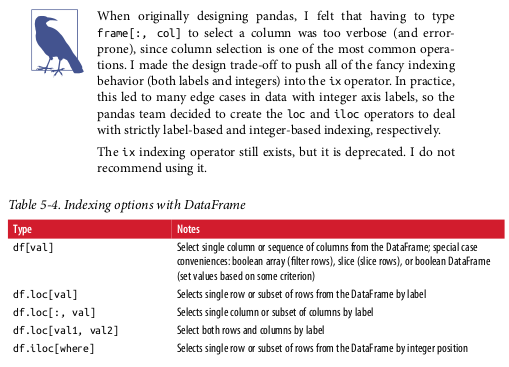

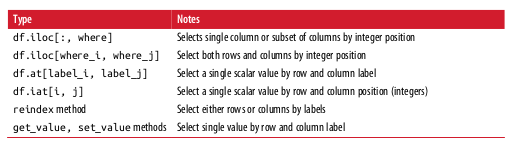



In [47]:
# Integer Indexes



# Trabajar con pandas objects indexed by integers algunas veces trae problemas a nuevos usuarios. Por ejemplo,
# no funciona intuitivamente como con las listas o tuplas
# si tienes esto: 

pd.Series(np.arange(3.))

# Aplicar un s[-1] es en general algo que traera bugs. Aqui tienes un index que contiene 0,1,2 pero
# inferir lo que quiere el usuario es dificil (label-based index or position-based)


0    0.0
1    1.0
2    2.0
dtype: float64

In [48]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [ ]:
# Para mantener consistencia, si tienes un axis index que contiene integers, la seleccion de data
# debe ser siempre label-oriented. Para un manejo mas preciso, se usa loc (for labels) o iloc (for integers)

In [19]:
# Ahora probemos el dropping data. Es muy sencillo eliminar data de una Serie o de un DataFrame; podemos usar
# la funcion drop(). Esta funcion toma un parametro, que puede ser el index or row label, para hacer drop. 
# Esto confunde nuevos usuarios porque drop no cabia el Dataframe por defecto, En lugar de eso, la funcion
# drop retorna una copia del DataFrame pero con la fila especificada removida

df.drop('school1')

,Class,Name,Score
school2,Chemistry,Jack,82


In [20]:
# Sin embargo, podemos ver la data original y ver que school1 continua ahi
df.head()

,Class,Name,Score
school1,Physics,Alice,85
school2,Chemistry,Jack,82
school1,Biology,Helen,90


In [22]:
# Drop tiene dos intersantes parametros. El primero se llana inplace, si se pone como true, el DataFrame
# se actualiza en el lugar en lugar de en una copia que te retorna
# El segundo parametro es el axes que sera dropped. Por defecto, su valor es 0 (eje de filas), sin embargo
# puede cambiarse a 1 por si se quiere hacer drop a alguna columna

# Por ejemplo, hagamos una copia de nuestro df


copy_df = df.copy()

copy_df.drop('Name',inplace=True,axis=1)
copy_df

,Class,Score
school1,Physics,85
school2,Chemistry,82
school1,Biology,90


In [38]:
# En un Dataframe, index values pueden ser elimitados de cualquier eje. Para ilustrar eso, creamos un DataFrame
# de ejemplo:

data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [39]:
# Llamando drop con una secuencia de etiquetas podemos hacer drop values de la row labels (axis 0)


data.drop(['Colorado', 'Ohio'])


,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [40]:
# tambien podemos hacer drop de una columna pasando axis= 1 o axis='columns'

data.drop('two', axis=1)


,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [23]:
# Hay otro camino para eliminar una columa y esto es directamente usando el indexing operator con el del keyword
# Este camino de hacer dropping, sin embargo, toma efectos inmediatos en el DataFrame y no retorna una vista


del copy_df['Class']
copy_df

,Score
school1,85
school2,82
school1,90


In [24]:
# Finalmente, añadir una nueva columna al DataFrame es sencillo al asignar algun valor usando el indexing operator
# Por ejemplo, si queremos añadir una class ranking column cn valor por defecto de None podemos haceo
# usando el asssignment operator luego de los corchetes. Esto hace broadcast del valor por defecto en la nueva
# columna inmediatamente

df['ClassRanking'] = None
df

,Class,Name,Score,ClassRanking
school1,Physics,Alice,85,None
school2,Chemistry,Jack,82,None
school1,Biology,Helen,90,None


En esta lectura aprendimos la estructura de datos usada en pandas: El DataFrame. Este es indexado por una filas y columnas y se puede seleccionar facilmente filas individuales y proyectar columnas de interes usando los metodos familiares de indexing

### DataFrame Indexing and Loading


Un flujo de trabajo comun es leer un dataset, usualmente de un archivo externo, y luego comenzar a limpiar y manipular el dataset para el analisis. En esta lectura te voy a demostrar como tu puedes cargar data de un archivo separado por coma en un DataFrame y algunas funcionalidades utiles

In [25]:
# Reindexing:

#Un metodo importante de los objetos de pandas es el reindex. Esto quiere decir que creas un objeto
# con la data conformada por un nuevo indice


obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj




d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [26]:
# Llamando reindex se hace rearranges de la data de acuerdo al nuevo indice, introduciendo missing values
# si alguno index value no esta realmente presente

obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2



a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [27]:
# Para data ordenada, como series de tiempo, a veces se desa hacer alguna inteprolacion o rellenar valores
# cuando se hace reindexing. Un metodo para hacer esto es utilizando ffill, que significa forward-fills.


obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3


0      blue
2    purple
4    yellow
dtype: object

In [30]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [33]:
# Cuando se hace reindexing, se pueden alterar las filas (index), columnas o ambas. Cuando se pasa
# solo una secuencia, esto hace reindex en las filas.

import numpy as np

frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                    index=['a', 'c', 'd'],
                    columns=['Ohio', 'Texas', 'California'])

frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [35]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [36]:
states = ['Texas', 'Utah', 'California']

frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


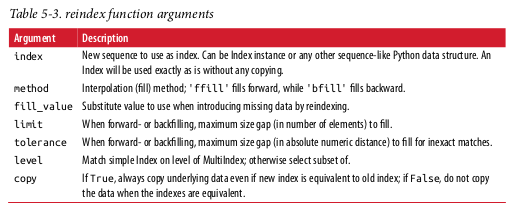

In [37]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [25]:
# Las libretas de jupyter utilizan ipython como el kernel underneath, este provee caminos convenientes para integrar
# con comandos del shell. Si utilizamos un signo de exclamacion se ejecutara la linea como un comando de shell
# Usaremos cat, de "concatenate", que hace un output del contenido de un archivo. Veamos el contenido de un archivo
# csv

!cat resources/week-2/datasets/Admission_Predict.csv

















































































































































































































































































































































































































400,333,117,4,5,4,9.66,1,0.95

In [3]:
# Vemos que el output es una lista de columnas y los identificadores de la columnas estan lsitados
# como strings en la primera linea del archivo. Luego tenemos filas de datos, todas las columnas separadas por comas
# Algunos archivos csv van a requerir que trabajes un poco en ellos antes de usarlos como DataFrame. Este no es el 
# caso

import pandas as pd

#Pandas te deja importar esto de una manera sencilla
df = pd.read_csv('resources/week-2/datasets/Admission_Predict.csv')
#Ahora veamos las primeras filas

df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Notamos que el default index inicia en 0 mientras que los seriales de los estudiantes inician en 1
# Si queremos volver al CSV output podemos deducir que pandas ha creado un nuevo index. Sin embargo
# podemos poner el numero de serial (serial no) como el index si queremos usarlo con index_col

df = pd.read_csv('resources/week-2/datasets/Admission_Predict.csv', index_col=0) 
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Notamos que hay dos columnas SOP y LOR que probablemente no todos sepan que significa. 
# Vamos a cambiar nuestros nombres de columnas para hacer esto mas claro. En Pandas, podemos usar rename()
# Esto toma un parametro llamado columns, en el que necesitamos pasar en un diccionario donde las keys son 
# los antiguos nombres y los values es el nuevo nombre de la columna correspondiente

new_df = df.rename(columns= { 'GRE Score': 'GRE Score', 'TOEFL Score': 'TOEFL Score',
                            'University Rating': 'University Rating', 'SOP': 'Statement of Purpose',
                            'LOR': 'Letter of Recommendation', 'CGPA':'CGPA', 'Research':'Research',
                            'Chance of Admit':'Chance of Admit'})

new_df.head()

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Vemos que se cambio SOP pero no se cambio LOR. Por que pasa esto?? 

# Primero, debemos asegurarnos que nuestros colun names estan escritos correctamente. Para eso usamos el atributo
# de columns

new_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# Aqui vemos que LOR tiene un espacio. Esto debe ser escrito exactamente. Chance of admit tambien tiene un espacio
# Por eso es que nuestro rename no funciono.

# Lo que podriamos hacer es cambiar "LOR " incluyendo el espacio. Hay varias formas de cambiar esto

new_df = new_df.rename(columns={'LOR ': 'Letter of Recomendation'})
new_df.head()

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letter of Recomendation,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
# Esto esta bien. Pero es fragil. Porque si hay mas elementos? o si no es un espacio sino un tab? o dos espacios?

# Otra manera es creaar una funcion que limpie y renombre para aplicar esa funcion
# a traves de toda la data. Python viene con amigables funciones para dividir en spacios en blanco
# esta es strip(). Cuando pasamos esto a rename, pasamos como el parametro de mapper y luego indicamos si el eje
# deben ser las colums or index (row labels)
new_df = new_df.rename(mapper = str.strip, axis='columns')
new_df.head()

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letter of Recomendation,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
# Todo bien. Recordemos que con este rename estamos viendo una copia de new_df con los nombres cambiados
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
# Tambien podemos utilizar el atributo df.column para asignar los nombres de las columnas y esto directamente
# renombrara las columnas. Esto modificara la informacion original del DataFrame y es muy eficiente especialmente
# cuando se tienen muchas columnas y solo quieres cambiar unas pocas. Esta tecnica no es afectada por errores
# en los nombres de las columnas, un problema que encontramos. Con una lista, puedes usar el list index
# para cambiar ciertos valores o usar el list comprehension para cambiar todos los valores

# veamos un ejemplo cambiando los nombres de las columnas a minusculas. Primero debemos tener las listas

cols = list(df.columns)
# Un poco de list comprehension
cols = [x.lower().strip() for x in cols]
# sobreescribimos con el .columns attribute
df.colums=cols
df.head()

/home/jrmelendezm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


En esta lectura aprendimos a importar archivos csv en un Pandas DataFrame. Tambien aprendimos como hacer un basic data cleaning a los nombres de las columnas. Los mecanismos para importar csv tienen un monton de diferentes opciones y realmente debemos aprenderlas para ser proeficiente en la data manipulation. Una vez que establecemos
el format y el shape del dataframe, tendremos un solido comienzo para iniciar las acciones de un data analysis y 
modelado

Hay otros tipos de datos que podemos cargar directamente como DataFrames, incluyendo HTML web pages, databases y otros formatos de archivos. Sin embargo, los archivos CSV es el formato mas comun para la data con la que trabajaremos y es importante saber como manipularla.

### Querying a DataFrame

En esta lectura vamos a hablar sobre consultas a DataFrames. El primer paso en el proceso es entender el Boolean masking. El Boolean masking es el corazon de una rapida y eficiente consulta en numpy y pandas; es analogo a el masking usado en otras areas de las ciencias de la computacion. 

Una boolean mask es un arreglo que puede ser de una dimension (como una serie) o de dos dimensiones (como un DataFrame), donde cada valor del arreglo son True o False. Este arreglo queda superpuesto a la data structure que estamos consultando. En cualquier celda alineada con un True el valor va a ser adminito en nuestro resultado final mientras que cualquier celda alineada con un false no lo será.


In [14]:
import pandas as pd 

# Carguemos nuestro archivo csv
df = pd.read_csv('resources/week-2/datasets/Admission_Predict.csv', index_col=0)

# Vamos a limpiar los nombres de las columnas como hicimos en la lectura pasada
df.columns = [x.lower().strip() for x in df.columns]

#veamos los resultados
df.head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
# Una boolean mask es creada por el applying operator directamente en la Serie o el DataFrame.
# Supongamos que nos interesan nuestros etudiantes con un chance of admit superior al 0.7
# Usaremos un operador > y se nos retornada una Boolean Serie. Esta serie resultante esta indexada de modo que
# donde el valor de cada celda, sea True or False, dependera de si el estudiante tiene un chance of admit > 0.7

admit_mask = df['chance of admit'] > 0.7
admit_mask

Serial No.
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23      True
24      True
25      True
26      True
27      True
28     False
29     False
30     False
       ...  
371     True
372     True
373     True
374     True
375    False
376    False
377    False
378    False
379    False
380     True
381     True
382     True
383     True
384    False
385     True
386     True
387    False
388    False
389    False
390     True
391    False
392     True
393     True
394     True
395     True
396     True
397     True
398     True
399    False
400     True
Name: chance of admit, Length: 400, dtype: bool

In [17]:
# El resultado de hacer un broadcasting con la comperacion es una Boolean mask. True or False depende de 
# la comparacion. Por debajo, Pandas esta aplicando el operador de comparacion a traves de la vectorizacion
# (De modo eficiente y paralelo). El resultado es una serie de una columna llena con valores de True or False
# resultante de la comparacion

# Que hacemos con esta boolean mask? Bueno, la utilizamos en nuestra data para esconder los valores que no 
# queremos que se muestren (Falses). Hacemos esto a traves de .where() en el DataFrame original

df.where(admit_mask).head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Vemos que la data resultante mantiene los valores del indexed original pero solo se muestra la data que
# permanecio con la condicion. Todas las filas que no respondieron la condicion vemos que tienen 
# un NaN value. Estas filas permanecieron. Por lo tanto, el siguiente paso sera removerlas. Podemos usar el 
# dropna()

df.where(admit_mask).dropna().head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
6,330.0,115.0,5.0,4.5,3.0,9.34,1.0,0.90


In [19]:
# a pesar de ser muy útil, where no se usa con tanta frecuencia. Los pandas devs crearon una manera corta
# para hacer esta sintaxis que combina where() y dropna(), haciendo ambos de una vez.

# Solamente tenemos que utilizar el indexing operator


df[df['chance of admit'] > 0.7].head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
6,330,115,5,4.5,3.0,9.34,1,0.90


In [20]:
# Esto puede parecer mas dificil de leer pero es muy comun cuando estas leyendo codigo de otras personas. Por lo 
# tanto es importante ser capaz de entenderlo. Haciendo un reviewing del indexing operator en un DataFrame
# vemos que ahora hace dos cosas:

# Puede ser llamado con un string parameter para proyectar una columa simple o una lista

df['gre score'].head()

Serial No.
1    337
2    324
3    316
4    322
5    314
Name: gre score, dtype: int64

In [22]:
df[['gre score', 'toefl score']].head()

,gre score,toefl score
Serial No.,,
1,337,118
2,324,107
3,316,104
4,322,110
5,314,103


In [23]:
# O podemos enviarle una boolean mask

df[df['gre score']>320].head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
4,322,110,3,3.5,2.5,8.67,1,0.80
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75


In [24]:
# Y cada uno de estos esta imitando la funcionalidad del .loc(), .where() y .dropna()

In [25]:
# Cuando queremos aplicar multiples boolean mask, como multiples criterios para incluir, podemos vernos tentados
# a utilizar and o or de una manera que es posiblemente mas natural. Si
# usamos and, Aqui se deben mostrar un True en la mascara final o usamos un or so solo necesitamos que una 
# sea True

# Desafortunadamente, esto no se siente tan natural en pandas. Si queremos tomar dos boolean series y unirlas
# nos dara un error

(df['chance of admit'] > 0.7) and (df['chance of admit'] < 0.9)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [26]:
# Esto no funciona. Y el problema aqui es que pandas no sabe como comparar dos obetos series usando and o or
# Sin embargo, los autores de pandas sobreescribrieron el pie | y el ampersand & para manejar esto por nosotros

(df['chance of admit'] > 0.7) & (df['chance of admit'] < 0.9)

Serial No.
1      False
2       True
3       True
4       True
5      False
6      False
7       True
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29     False
30     False
       ...  
371     True
372     True
373    False
374     True
375    False
376    False
377    False
378    False
379    False
380     True
381     True
382     True
383     True
384    False
385    False
386    False
387    False
388    False
389    False
390     True
391    False
392     True
393     True
394     True
395     True
396     True
397     True
398    False
399    False
400    False
Name: chance of admit, Length: 400, dtype: bool

In [28]:
# Cuidado con los parentesis. Si no los usas apropiedamente no funcionara. Pandas entendera que 
# quieres hacer un bitwise con 0.7 y un pandas dataframe cuando realmente queremos un bitwise y un
# broadcasted dataframe.

df['chance of admit'] > 0.7 & df['chance of admit'] < 0.9

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [30]:
# Otra forma de hacer esto es deshacerse del comparison operator completamente y, en su lugar, utilizar
# una built in function

df['chance of admit'].gt(0.7) & df['chance of admit'].lt(0.9)

Serial No.
1      False
2       True
3       True
4       True
5      False
6      False
7       True
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29     False
30     False
       ...  
371     True
372     True
373    False
374     True
375    False
376    False
377    False
378    False
379    False
380     True
381     True
382     True
383     True
384    False
385    False
386    False
387    False
388    False
389    False
390     True
391    False
392     True
393     True
394     True
395     True
396     True
397     True
398    False
399    False
400    False
Name: chance of admit, Length: 400, dtype: bool

In [31]:
# Ambas funcionan. Se puede decidir entre usar una forma u otra. Incluso esta manera de usar las built in function
# permite concatenar y el resultado sera igual solamente que no tendra operadores visuales

df['chance of admit'].gt(0.7).lt(0.9)

Serial No.
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23     False
24     False
25     False
26     False
27     False
28      True
29      True
30      True
       ...  
371    False
372    False
373    False
374    False
375     True
376     True
377     True
378     True
379     True
380    False
381    False
382    False
383    False
384     True
385    False
386    False
387     True
388     True
389     True
390    False
391     True
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399     True
400    False
Name: chance of admit, Length: 400, dtype: bool

En esta lectura aprendimos como hacer consultas a DataFrames usando boolean masking, lo cual es extremadamente importante en el mundo del Data Science (50% del trabajo en data cleaning es haciendo consultas). Con una boolean masking podeos seleccionar data basada en difentes criterios.

### Indexing DataFrames / Indexing, Selection and Filtering

Como hemos visto, tanto las Series como los DataFrames tienen indices. El Index es esencialmente una etiqueta de las filas (a row level label) y en pandas las filas corresponden al eje 0 (axis zero). Los indices pueden ser autogenerados cuando se crea una serie sin indice, en este caso se obtienen valores numericos, o pueden ser explicitos, cuando se usa un diccionario, o cuando cargamos data de un archivo csv y hacemos set con los parametros apropiados

In [42]:
# Series indexing (obj[...]) trabaja de forma analoga que en un NumPy array indexing, excepto cuando se usan
# Series's index values en lugar de solo enteros.

obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [43]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [44]:
# slicing with labels se comporta un poco diferente dado que el punto final (end-point) es inclusivo

obj['b':'c']


b    1.0
c    2.0
dtype: float64

In [45]:
# Hacer setting usando estos metodos modifica la correspondiente seccion se la Serie

obj['b':'c'] = 5
obj


a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [13]:
# Usaremos la funcion set_index(). Esta funcion es un proceso destructivo. No mantiene el indice actual
# Si queremos mantener el indice actual, necesitamos manualmente crear una nueva columna y copiar su valor
# con el index attribute


import pandas as pd 
df = pd.read_csv('resources/week-2/datasets/Admission_Predict.csv', index_col = 0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
# Ahora supongamos que no queremos que nuestro df sea etiquetado por el Serial Number, en su lugar, queremos
# que sea etiquetado con el chance of admit. Pero asumamos que queremos tener el Serial Number para luego. 
# entonces, debemos preservar el serial number como una nueva columna. Podeos hacer esto con el indexing operator
# en el string que tiene el nombre de la columna. Luego, podemos usar set_index con chance of admit

# copiemos la ada en su proia columna

df['Serial Number']=df.index
#Pongamos como index la otra columna
df.columns = [x.lower().strip() for x in df.columns]
df = df.set_index('chance of admit')
df.head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,serial number
chance of admit,,,,,,,,
0.92,337,118,4,4.5,4.5,9.65,1,1
0.76,324,107,4,4.0,4.5,8.87,1,2
0.72,316,104,3,3.0,3.5,8.00,1,3
0.80,322,110,3,3.5,2.5,8.67,1,4
0.65,314,103,2,2.0,3.0,8.21,0,5


In [15]:
# Cuando creamos un nuevo index a partir de una columna existente, el index tiene un nombre. El cual es el nombre
# de la columna original


# Tambien podemos eliminar el index completamente llamando la funcion reset_index(). Esto convierte el index
# en una columna y crea un indice enumerado por defecto
df = df.reset_index()
df.head()

,chance of admit,gre score,toefl score,university rating,sop,lor,cgpa,research,serial number
0,0.92,337,118,4,4.5,4.5,9.65,1,1
1,0.76,324,107,4,4.0,4.5,8.87,1,2
2,0.72,316,104,3,3.0,3.5,8.00,1,3
3,0.80,322,110,3,3.5,2.5,8.67,1,4
4,0.65,314,103,2,2.0,3.0,8.21,0,5


In [16]:
# Una buena caracteristica de Pandas es un multi-level index. Cuando tenemos un indice de multiniveles, es simmilar
# a tener llaves compuestas en un sistema de bases de datos relacional. Para crear esto, aplicamos set index
# a una lista de columnas.

# Pandas va a  buscar con este orden, encontrando la data distintiva y formando indices compuestos
# Un buen ejemplo de esto es cuando tenemos data geografica que es ordenada por regiones o demografia
# Cambiemos los datasets y busquemos algunos censos para un mejor ejemplo. Esta data se almacena en el
# census.csv y viene del United States Census Bureau. En particular, este es un breakdown en el nivel de la poblacion
# en el US county level. Es un gran ejemplo de como se pueden formar datasets cuando se intenta limpiar data

df = pd.read_csv('resources/week-2/datasets/census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [17]:
# En este dataset tenemos dos columnas resumidas (summarized levels), uno contiene informacion resumida para el
# whole country, y otra contiene informacion resumida de cada estado. Queremos ver una lista de todos los valores
# unicos en una columna dada. Veremos los posibles valores para Sum Level usando la funcion unique en el DataFrame
# Esto es similar al SQL distinct operator

df['SUMLEV'].unique()

array([40, 50], dtype=int64)

In [18]:
# Vemos que solo hay 2 valores diferentes: 40 y 50

In [19]:
# Vamos a excluir las filas que son resumenes del state level y solo nos quedaremos con el county data

df = df[df['SUMLEV']==50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [21]:
# Mientras que esta data es interesante por diferentes razones, vamos a reducirla para solamente mirar la 
# poblacion total estimada y el numero total de nacimientos. Podemos hacer esto creando una lista de columnas
# que queremos mantener, luego proyectar esto y asignar el resultado en nuestra variable

columns_to_keep = ['STNAME','CTYNAME','BIRTHS2010','BIRTHS2011','BIRTHS2012','BIRTHS2013',
                   'BIRTHS2014','BIRTHS2015','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012', 
                   'POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015']

df = df[columns_to_keep]
df.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
1,Alabama,Autauga County,151,636,615,574,623,600,54660,55253,55175,55038,55290,55347
2,Alabama,Baldwin County,517,2187,2092,2160,2186,2240,183193,186659,190396,195126,199713,203709
3,Alabama,Barbour County,70,335,300,283,260,269,27341,27226,27159,26973,26815,26489
4,Alabama,Bibb County,44,266,245,259,247,253,22861,22733,22642,22512,22549,22583
5,Alabama,Blount County,183,744,710,646,618,603,57373,57711,57776,57734,57658,57673


In [22]:
# Este censo desglosa la poblacion estimada por estado y county. Podemos cargar la data y aplicar set_index
# para hacer una combinacion de los valores de county y state y ver como pandas maneja esto.
# Lo haremos creando una lista con los indentificadores que queremos tener indexados y luego llamar set_index
# con esta lista. Veremos que tenemos indice dual (dual index), primero, el estado y luego el county

df = df.set_index(['STNAME','CTYNAME'])
df.head()

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                          
Alabama Autauga County         151         636         615         574   
        Baldwin County         517        2187        2092        2160   
        Barbour County          70         335         300         283   
        Bibb County             44         266         245         259   
        Blount County          183         744         710         646   

                        BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME  CTYNAME                                                   
Alabama Autauga County         623         600            54660   
        Baldwin County        2186        2240           183193   
        Barbour County         260         269            27341   
        Bibb County            247         253            22861   
        Blount County          618         603            57373   

                        POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME  CTYNAME                                                             
Alabama Autauga County            55253            55175            55038   
        Baldwin County           186659           190396           195126   
        Barbour County            27226            27159            26973   
        Bibb County               22733            22642            22512   
        Blount County             57711            57776            57734   

                        POPESTIMATE2014  POPESTIMATE2015  
STNAME  CTYNAME                                           
Alabama Autauga County            55290            55347  
        Baldwin County           199713           203709  
        Barbour County            26815            26489  
        Bibb County               22549            22583  
        Blount County             57658            57673

In [23]:
# Esta es una buena representacion de la data y de como los estados mantienen dentro el county.

# Una pregunta inmediata que podemos consultar a este DataFrame. Como vimos previamente, el loc attribute puede
# tener multiples argumentos, y esto puede ser manejado aun si quisieramos consultar las filas o por las columnas
# Cuando usamos MultiIndex, podemos proveer argumentos en order por el level que queramos consultar
# Dentro del idnex, cada columna es llamada "level" y la columna mas afuera es el level zero

# Si queremos los resultados de la poblacion para Washtenaw County en el estado de Michigan
# el primer argumento deberia ser Michigan y el segundo Washtenaw County

df.loc['Michigan','Washtenaw County']

BIRTHS2010            977
BIRTHS2011           3826
BIRTHS2012           3780
BIRTHS2013           3662
BIRTHS2014           3683
BIRTHS2015           3709
POPESTIMATE2010    345563
POPESTIMATE2011    349048
POPESTIMATE2012    351213
POPESTIMATE2013    354289
POPESTIMATE2014    357029
POPESTIMATE2015    358880
Name: (Michigan, Washtenaw County), dtype: int64

In [24]:
# Si nos interesa comparar dos counties, por ejemplo, Washtenaw y Wayne County, podemos pasar una lista de tuplas
# describiendo el indice como queremos consultar en un loc. Como tenemos MultiIndex, el estado y el county,
# necesitamos dar dos valores de cada elemento en nuestra filtering list. Cada tupla tiene dos elementos, siendo
# el primer elemento el primer index y el segundo elemento el segundo index

# En este caso, tenemos una lista de dos tuplas. En cada tupla el primer elemento es Michigan y el segundo elemento
# es un county

df.loc[ [('Michigan','Washtenaw County'),
         ('Michigan','Wayne County')]]

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME   CTYNAME                                                            
Michigan Washtenaw County         977        3826        3780        3662   
         Wayne County            5918       23819       23270       23377   

                           BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME   CTYNAME                                                     
Michigan Washtenaw County        3683        3709           345563   
         Wayne County           23607       23586          1815199   

                           POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME   CTYNAME                                                               
Michigan Washtenaw County           349048           351213           354289   
         Wayne County              1801273          1792514          1775713   

                           POPESTIMATE2014  POPESTIMATE2015  
STNAME   CTYNAME                                             
Michigan Washtenaw County           357029           358880  
         Wayne County              1766008          1759335

La gerarquia de indices es una parte especial de la libreria de Pandas con la que se puede hacer sencilla un manejo y razonamiento de la data. Por ejemplo, podemos hacer una transpuesta de esta matriz y luego tener gerarquia en las column labels. Proyectar una columa tiene el mismo comportamietno de labels que esperariams. Ahora, en realidad esto no es muy utilizado, es mas comun manipular todo en columnas pero aun asi es un aspecto unico y sofisticado de pandas que es util saber, especialmente si se visualiza data en forma tabular

### Missing Values

Hemos visto previamente como Pandas maneja los missing values, usando el None type o el NaN de numpy. Missing values son muy comunes en actividades de limpiar data y pueden ocurrir por muchos motivos.

- Missing at Random: Cuando el missing value es realmente una omisión. Se denomina asi cuando hay otras variables que pueden ser usada para predecir la variable missing; por ejemplo dicen que el interés en participar en un estudio de seguimiento, a menudo tiene alguna relación con otro campo de datos, como género o etnia
- Missing Completely at Random: Cuando no hay relacion con otras variables


Veamos como tratar esta data

In [25]:
import pandas as pd

In [28]:
# Pandas es muy bueno para detectar los missing values directamente de los formatos, como los archivos CSV.
# Aunque a veces los valores estan fomrmateados como NaN, NULL, None, N/A, algunas veces missing values estan 
# etiquetados claramente. Por ejemplo, cientificos sociales a veces usan el valor 99 en categorias binarias para
# indicar un missing value. Esto permite poder usar scalar, string, listo or diccionarios

df = pd.read_csv('resources/week-2/datasets/class_grades.csv')
df.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,NaN,63.15,48.89
3,7,NaN,NaN,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
7,7,72.85,86.85,60.00,NaN,56.11
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61


In [29]:
# Podms usar la funcion .isnull para crear una boolean mask por todo el dataframe. Esto efectivamente hace
# broadcast de isnull() a cada celda de la data
mask = df.isnull()

# Aqui obtenemos algo de la misma forma y tamañao que nuestro DataFrame pero es una Boolean Mask

mask.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,True,False,False
3,False,True,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,True,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [30]:
# Esto puede ser util para procesar filas basada en ciertas columnas de data. Otra operacion util es 
# ser capaz de hacer un drop all de estas filas que tienen missing data, lo cual puede hacerse con .dropna()

df.dropna().head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61
10,7,80.44,90.20,75.00,91.48,39.72
12,8,97.16,103.71,72.50,93.52,63.33
13,7,91.28,83.53,81.25,99.81,92.22


In [32]:
# Notamos que los indices 2,3,7 y 11 ahora no estan. Otra funcion es para rellenar los valores donde no haya datos
# con la funcion .fillna(). Esta funcion toma un numero de parametros donde podemos pasar un valor, llamado 
# scalar value, para cambiar toda la rata faltante a un valor. Esto no es realmente aplicable en este caso pero
# es muy comun


# Si queremos llenar los valores faltantes con 0, usamos fillna
df.fillna(0,inplace=True)
# Usamos inplace True para aplicar este cambio a nuestro df
df.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,0.00,63.15,48.89
3,7,0.00,0.00,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
7,7,72.85,86.85,60.00,0.00,56.11
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61


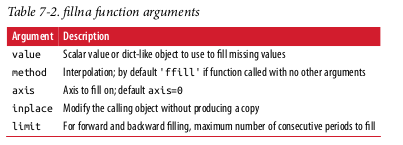

In [33]:
# Tambien podemos usar el na_filter option para apagar las opciones de filtrado con espacios en blanco. Esto se usa
# Si un espacio en blanco en realidad es un valor de interes. En practica, esto es raro, pero podemos pasar el
# na_filter = false para mejorar el desempeño leyendo un archivo grande

# Algunas veces es necesario utilziar los missing values como informacion. Por ejemplo, en un registro
# de los cursos online, con estadisticas del playback. Por ejemplo, el estado completo del playback
# donde se escucha el video, en que tamaño, cual video esta siendo renderizado a la pantalla, como es el volumen, etc

# Veamos un archivo log para ver como se veria esto

df=pd.read_csv('resources/week-2/datasets/log.csv')
df.head(20)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


In [34]:
# La primera columna es un timestamp, el segundo es un user name y un web page qu estan visitando y el video que 
# reproducen. Cada fila del DataFrame indica un playback position. el timestamp esta alrededor de 30 segundos
# Resulta que Bob ha pausado su reproducción, por lo que a medida que aumenta el tiempo, la posición de reproducción no cambia.
# Tenga en cuenta también lo difícil que es para nosotros tratar de derivar este conocimiento de los datos,
# porque no está ordenado por marca de tiempo como se podría esperar. En realidad, esto no es raro en
# sistemas que tienen un alto grado de paralelismo. Hay muchos valores faltantes en las columnas en pausa y volumen.
# No es eficiente enviar esta información a través de la red si no ha cambiado, por lo que las implementaciones rara vez lo hacen.
# Entonces, este sistema en particular simplemente inserta valores nulos en la base de datos si no hay cambios



In [35]:
# Dos valores comunes para relnar son ffill y bfill. ffill for forward filling, este actualiza un na value
# de una celda particular con el valor de la fila anterior, bfill para backward filling, el opuesto a ffill.
# Este llena el valor con el siguiente. Notamos que para hacer esto nuestra data debe estar ordenada
# Usualmente la data que viene de un tradicionar database management system no tiene la garantia de estar ordenada
# Hay que ser cuidadosos

# En pandas podemos ordenar por indice o por valor. Vamos a poner el timestamp como indice y luego ordenamos

df = df.set_index('time')
df = df.sort_index()
df.head(20)

,user,video,playback position,paused,volume
time,,,,,
1469974424,cheryl,intro.html,5,False,10.0
1469974424,sue,advanced.html,23,False,10.0
1469974454,cheryl,intro.html,6,NaN,NaN
1469974454,sue,advanced.html,24,NaN,NaN
1469974484,cheryl,intro.html,7,NaN,NaN
1469974514,cheryl,intro.html,8,NaN,NaN
1469974524,sue,advanced.html,25,NaN,NaN
1469974544,cheryl,intro.html,9,NaN,NaN
1469974554,sue,advanced.html,26,NaN,NaN


In [37]:
# Vemos que esto no nos garantiza mucho. Hay usuarios que estan usando el sistema al mismo tiempo. Esto es muy comun
# Mejor hagamos un segundo nivel que tenga el nombre para manejar esto

df = df.reset_index()
df = df.set_index(['time','user'])
df.head(20)

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6    NaN     NaN
           sue     advanced.html                 24    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN
1469974514 cheryl     intro.html                  8    NaN     NaN
1469974524 sue     advanced.html                 25    NaN     NaN
1469974544 cheryl     intro.html                  9    NaN     NaN
1469974554 sue     advanced.html                 26    NaN     NaN
1469974574 cheryl     intro.html                 10    NaN     NaN
1469974604 cheryl     intro.html                 11    NaN     NaN
1469974624 sue     advanced.html                 27    NaN     NaN
1469974634 cheryl     intro.html                 12    NaN     NaN
1469974654 sue     advanced.html                 28    NaN     5.0
1469974664 cheryl     intro.html                 13    NaN     NaN
1469974694 cheryl     intro.html                 14    NaN     NaN
1469974724 cheryl     intro.html                 15    NaN     NaN
           sue     advanced.html                 29    NaN     NaN
1469974754 sue     advanced.html                 30    NaN     NaN
1469974824 sue     advanced.html                 31    NaN     NaN

In [41]:
df = df.fillna(method='ffill')
df.head()

video  playback position  paused  volume
time       user                                                    
1469974424 cheryl     intro.html                  5   False    10.0
           sue     advanced.html                 23   False    10.0
1469974454 cheryl     intro.html                  6   False    10.0
           sue     advanced.html                 24   False    10.0
1469974484 cheryl     intro.html                  7   False    10.0

In [43]:
# Tambien podemos customizar fill-in para reemplazar valores con replace() function. Esto permite 
# reemplazar desde muchas aproximaciones: value-to-value, list, dictionary, regex. Hagamos un ejemplo sencillo

df = pd.DataFrame( {'A': [1,1,2,3,4],
                    'B': [3,6,3,8,9],
                    'C': ['a','b','c','d','e']})
df

,A,B,C
0,1,3,a
1,1,6,b
2,2,3,c
3,3,8,d
4,4,9,e


In [44]:
# Vamos a remplazar los 1's por 100 con value-to-value

df.replace(1,100)

,A,B,C
0,100,3,a
1,100,6,b
2,2,3,c
3,3,8,d
4,4,9,e


In [45]:
# Y sobre cambiar dos valores? intentamos cambiar los 1's a 100 y los 3's a 300

df.replace([1,3],[100,300])

,A,B,C
0,100,300,a
1,100,6,b
2,2,300,c
3,300,8,d
4,4,9,e


In [46]:
# Pandas soporta regex tambien! Veamos como usar esto en nuestro dataset logs

df=pd.read_csv('resources/week-2/datasets/log.csv')
df.head(20)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


In [47]:
# Para reemplazar usando regex hacemos que el primer parametro de replace sea el pattern que queremos buscar 
# y el segundo parametro el valor que queremos emitir al coincidir, luego pasamos un tercer parametro "regex = True"

# Queremos detectar todas las paginas html en la columa video. Eso implica que termina en "html" y queremos
# sobreescribir con el keyword "webpage"
# Nuestra solucion sera hacer matching a cualqueir numero o caracter y luego que termine en .html

In [48]:
df.replace(to_replace= '.*.html$', value="webpage",regex=True)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,webpage,5,False,10.0
1,1469974454,cheryl,webpage,6,NaN,NaN
2,1469974544,cheryl,webpage,9,NaN,NaN
3,1469974574,cheryl,webpage,10,NaN,NaN
4,1469977514,bob,webpage,1,NaN,NaN
5,1469977544,bob,webpage,1,NaN,NaN
6,1469977574,bob,webpage,1,NaN,NaN
7,1469977604,bob,webpage,1,NaN,NaN
8,1469974604,cheryl,webpage,11,NaN,NaN
9,1469974694,cheryl,webpage,14,NaN,NaN


Como comentario final, usualmente cuando se hace estadistica en pandas y hay missing values, estas funciones tipicamente los ignoran. Por ejemplo, si quisieramos calcular el promedio, la funcion de numpy que está por debajo va a ignorar los missing values. Esto es usualmente lo que uno quiere pero hay que ser cuidadosos con que el valor realmente este siendo excluido.

El por qué tu tienes missing values tambien es importante, dependiendo del problema que estes tratando de resolver. Podría ser irrazonable inferir valores faltantes, por ejemplo, si los Datos no deberían existir en  primer lugar. 

### Example: Manipulating DataFrame


In [1]:
# Usaremos un dataset de wikipedia con los presidentes de US

import pandas as pd

df = pd.read_csv('resources/week-2/datasets/presidents.csv')
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age
0,1,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days"
1,2,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days"
2,3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days"
3,4,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days"
4,5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days"


In [2]:
# Aqui tenemos algunos presidentes, fechas, footnotes en "Born" que capaz pueda causar problemas.
# Comencemos a limpiar esto al separar el Firstname y el lastname. Tomaremos esto con un regex
# y crearemos una nueva columna para aplicar regex a la proyeccion de la columa "presidente".

In [3]:
# Aqui hay una solucion. Podemos hacer una copia de la columna presidente
df['First'] = df['President']
# Luego podeos usar replace() y dar un patron que coincida con el apellido y sustituirlo por un string vacio
df['First'] = df['First'].replace("[ ].*",'',regex = True)
# Veamos
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age,First
0,1,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days",George
1,2,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days",John
2,3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days",Thomas
3,4,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days",James
4,5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days",James


In [4]:
# Esto funciona pero es lento ya que tuvimos que hacer una copia completa de la columa y luego pasar para
# actualizar las cadenas

# Una forma mas general seria apply() function. Primero vamos a eliminar esta columna que hicimos
del(df['First'])

In [5]:
# La funcion apply() en el DataFrame va a tomar una funcion arbitraria que escribes y la aplica
# a toda la serie (una single column) o DataFrame a lo largo de todas las filas o columnas. Escribamos una funcion
# que solo divida el string en dos piezas usando una single row of data

def splitname(row):
    # La fila es un Series object con solo una single row indexed by column values
    # extraemos el firstname y creamos una nueva entrada en la serie
    row['First']=row['President'].split(" ")[0]
    # Hacemos lo mismo con el lastname
    row['Last']=row['President'].split(" ")[-1] # con el -1 no tenemos que preocuparnos por segundos nombres
    
    # return a row y pandas .apply tomara el mergin de nuevo a un DataFrame
    return row

df = df.apply(splitname,axis='columns')
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age,First,Last
0,1,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days",George,Washington
1,2,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days",John,Adams
2,3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days",Thomas,Jefferson
3,4,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days",James,Madison
4,5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days",James,Monroe


In [6]:
# Es bastante cuestionable si este modo es menos rudo pero logra el resultado y usa la funcion .apply(), bastante
# util.

# Otra funcion util es .extract(). Vamos a hacer drop a las columnas que hicimos de first y last

del(df['First'])
del(df['Last'])

# Extract toma una regular expression como input y especificamete requiere que establezca grupos de captura
# que correspondan a las columnas de salida que estamos interesados. 

# Aqui hay una solucion, donde coinciden tres grupos pero solo se retornan dos: el first y el last name

pattern= "(^[\w]*)(?:.* )([\w]*$)"

# Ahora la funcion .extract esta en el str attibute de una Series object, por lo que podemos llamarla
# usando Series.str.extract(pattern)

df['President'].str.extract(pattern).head()


,0,1
0,George,Washington
1,John,Adams
2,Thomas,Jefferson
3,James,Madison
4,James,Monroe


In [7]:
# Esto se ve bien. Faltaria el nombre de las columnas. Si nombramos los grupos, obtenemos los nombres de la columna.
# Actualizaremos este patron para recordar que podemos crear grupos con nmbres
# Asi que solo ponemos el signo de interrogacion con P mayuscula y luego entre <> podemos el nobmre del grupo

pattern = "(?P<First>^[\w]*)(?:.* )(?P<Last>[\w]*$)"

# ahora llamamos a extract
names= df['President'].str.extract(pattern)

In [8]:
names.head()

,First,Last
0,George,Washington
1,John,Adams
2,Thomas,Jefferson
3,James,Madison
4,James,Monroe


In [9]:
# Ahora copiamos esto en nuestro DataFrame Principal

df['First'] = names['First']
df['Last'] = names['Last']

df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age,First,Last
0,1,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days",George,Washington
1,2,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days",John,Adams
2,3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days",Thomas,Jefferson
3,4,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days",James,Madison
4,5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days",James,Monroe


In [10]:
# Por lo tanto, vale la pena mirar el modulo Pandas Str para otras funciones que han sido escritas especificamente
# para limpiar cadenas y DataFrames. Puedes encontrar esto en la documentacion en Working with Text
# section: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [11]:
# Pasando a la limpieza de la columna Born, Primero tendremos que deshacernos de cualqueir cosa que no este en
# el patron dia,mes,año

# Usaremos grupos de captura nuevamente pero solo nos quedaremos con un grupo

df['Born'] = df['Born'].str.extract("([\w]{3} [\w]{1,2}, [\w]{4})")

# Aqui queremos capturar cualquier cosa con 3 caracteres, seguido de n espacio, seguido de algo de 1 a 2 (el dia),
# seguido de una coma y luego una fecha con 4 caracteres

df['Born'].head()

0    Feb 22, 1732
1    Oct 30, 1735
2    Apr 13, 1743
3    Mar 16, 1751
4    Apr 28, 1758
Name: Born, dtype: object

In [12]:
# Esto limpia el formato de fecha. Sin embargo, cabe mencionar algo. El tipo de esta columna es en realidad
# un objeto y sabemos que eso es lo que pandas usa cuando esta trabajando con strings. Pero, pandas realmente tiene
# unas caracteristicas interesantes de date/time. De hecho, esa es una de las razones por las que 
# McKinney puso sus esfuerzos en la libreria, el trabajaba con transacciones financieras. 
# Vamos a actualizar esto para escribir correctamente el tipo de data

df['Born'] = pd.to_datetime(df['Born'])
df['Born'].head()

0   1732-02-22
1   1735-10-30
2   1743-04-13
3   1751-03-16
4   1758-04-28
Name: Born, dtype: datetime64[ns]

In [13]:
# Esto permite subsecuente procesamiento de nuestro DataFrame a traves de las fechas. Como por ejemplo, 
# obtener los presidentes que nacieron en cierto time span mucho mas facil

Muchas de las otras columnas de este dataset pueden limpiarse siguiendo el mismo estilo. Es una buena practica. Podemos terminar de limpiar al DataFrame. En esta lectura conocimos el modulo Str que tiene una serie de funciones importantes para limpiar los DataFrames de pandas. Realmente apply es suficiente para trabaar con datasets pequeños. Pero las funciones que tiene str son realmente utiles y con el conocimiento de las expresioens regulares. Como son vectorizadas, son eficientes.

In [14]:
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age,First,Last
0,1,George Washington,1732-02-22,"57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days",George,Washington
1,2,John Adams,1735-10-30,"61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days",John,Adams
2,3,Thomas Jefferson,1743-04-13,"57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days",Thomas,Jefferson
3,4,James Madison,1751-03-16,"57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days",James,Madison
4,5,James Monroe,1758-04-28,"58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days",James,Monroe


### Summarizing and Computing Descriptive Statistics

Los objetos de pandas estan equipados con un set de metodos comunes de matematicas y estadisticas. Estos caen en la categoria de reductions or summary statistics. Estos metodos extraen un single value (como sum o mean) de una serie, o Series de valores.

In [49]:
# Consideremos un DataFrame Pequeño

df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                    [np.nan, np.nan], [0.75, -1.3]],
                    index=['a', 'b', 'c', 'd'],
                    columns=['one', 'two'])
# Para retornar la Suma: el metodo sum retorna una Serie conteniendo la suma de cada columna

df.sum()


one    9.25
two   -5.80
dtype: float64

In [51]:
# pasando axis = 'columns' ( o axis = 1 ) podemos sumar a lo largo de la columa

df.sum(axis='columns') # Los valores nan se excluyen.

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [52]:
# Si no queremos excluir los NA podriamos desactivarlo haciendo

df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [53]:
# describe() provee multiples resumenes estadisticos en una sola llamada
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [54]:
# Si se trata de labels tambien podemos usar describe para obtener estadisticas
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj



0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [55]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

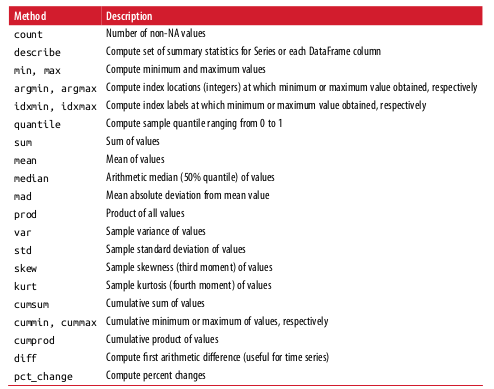

In [59]:
# Otras funciones utiles serian: 

obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

# unique() para seleccionar valores unicos de una serie
uniques=obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [60]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [61]:
mask = obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

### Data Cleaning and Preparation

Durante el transcurso de hacer data analysis o modeling, una significante cantidad de tiempo se ira en la preparacion de los datos: carga, limpieza, transofmracion y rearranging. Estas tareas a veces se reporta que toman el 80% o mas del tiempo del analisis. Algunas veces la data se encuentra almacenada en archivos y databases que no estan en el formato correcto para una tarea en particular. Pandas provee un alto nivel, flexible y rapido set de herramientas para permitir manipular la data a la forma correcta.

#### Handling missing data

Missing data ocurre comunmente en muchas data analysis applications. Uno de los logros de pandas es hacer el trabajo con missing data lo menos doloroso posible. Por ejemplo, todas las descriptive statistics on pandas excluyen missing data por defecto. Para la data numerica, Pandas usa el floating-point value **NaN** (Not a number)

In [62]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [63]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [64]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [65]:
# En pandas se usa la convencion de R para referirse a la missing data como NA, que viene de Not Available.
# En aplicaciones estadisticas, NA data puede ser data que no existe o que existe pero no es observada.
# Cuando se hace limpieza es importante hacer un analisis de la missing data por si misma para identificar
# problemas o sesgos que causen el missing data

#El objeto None tambien se trata como missing data

string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

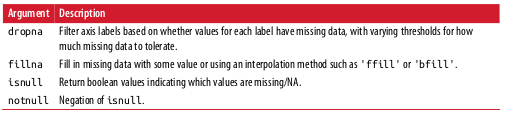

In [68]:
# Hay algunos caminos para filtrar la missing data. Siempre se tiene la opcion de usar pandas.isnull y boolean indexing
# el dropna puede ser util tambien. En series, esto retornara una Serie con solamente los non-null data and index values

from numpy import nan as NA

data = pd.Series([1,NA,3.5,NA,7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [69]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [71]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [72]:
# Con los DataFrames puede ser un poco mas complicado. dropna por defecto drops cualquier fila que contiene 
# missing values

data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                    [NA, NA, NA], [NA, 6.5, 3.]])

cleaned = data.dropna()

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [73]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [74]:
# Para hacer drop de columnas hacemos axis=1
# Podemos aplicar how = 'all' para hacer drop de aquellas columnas (o filas) que tengan todos los datos en NA

data[4]= NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [75]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


### Data Transformation

#### Removing duplicates

filas duplicadas se pueden encontrar en un DataFrame por cualquier cantidad de razones

In [77]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                    'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [78]:
# El metodo duplicated retorna una Serie Booleana que indica cuando la fila es duplicada
# (Que se observa en una fila previa) o no

data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [79]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [80]:
# Ambos metodos, por defeto, consideran todas las columnas. Puedes especificar un subset de ellos para detectar
# los duplicados. 

data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [81]:
# Suponiendo que queremos filtrar basandonos en k1
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [82]:
# Por defecto, permanece el primer valor observado. Esto se puede cambiar pasando keep='last'

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6
